,division,premean,postmean,loss
0,1.5,5.560000,7.501111,15.723089
1,2.5,5.630000,7.726250,12.083388
2,3.5,5.723333,7.985714,8.365638
3,4.5,5.892500,8.250000,5.775475
4,5.5,6.074000,8.540000,3.911320
5,6.5,6.236667,8.912500,1.930008
6,7.5,6.617143,8.916667,8.009810
7,8.5,6.877500,9.025000,11.735400
8,9.5,7.113333,9.050000,15.738600


division    6.500000
premean     6.236667
postmean    8.912500
loss        1.930008
Name: 5, dtype: float64

<IPython.core.display.Javascript object>


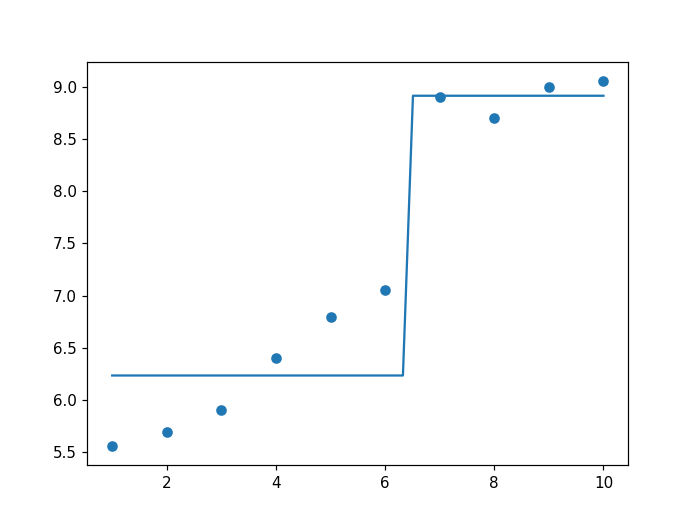

<IPython.core.display.Javascript object>


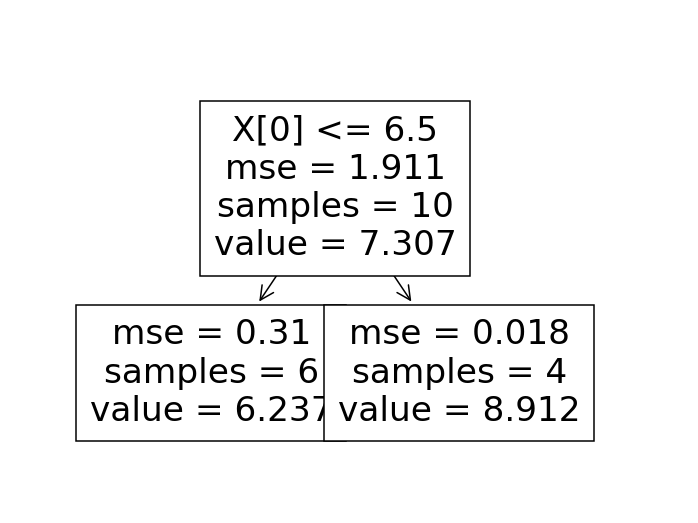

In [1]:
%matplotlib notebook
import pandas, statistics, sklearn.tree, numpy, matplotlib.pyplot
from IPython.display import display

y = [5.56, 5.7, 5.91, 6.4, 6.8, 7.05, 8.9, 8.7, 9, 9.05]
x = [[_] for _ in range(1, len(y) + 1)]

table = pandas.DataFrame([[_ + 0.5, statistics.mean(y[:_]), statistics.mean(y[_:]), statistics.pvariance(y[:_]) * _ + statistics.pvariance(y[_:]) * (len(y) - _)] for _ in range(1, len(y))],
                         columns=['division', 'premean', 'postmean', 'loss'])
display(table)
division = table.loc[table.loss.idxmin()]
display(division)
def regressionFunction(variable):
    return division.premean if variable < division.division else division.postmean

regressor = sklearn.tree.DecisionTreeRegressor(max_depth=1)
regressor.fit(x, y)
_, axes = matplotlib.pyplot.subplots()
axes.scatter(x, y)
test = numpy.linspace(1, 10)[:,None]
axes.plot(test, regressor.predict(test))
_, axes2 = matplotlib.pyplot.subplots()
sklearn.tree.plot_tree(regressor, ax=axes2)
display()